# Air Passengers Time Series

In [292]:
import pandas as pd
import numpy as np
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [213]:
df = pd.read_csv('../../dataset/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [214]:
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)
 
df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 2000x2000 with 0 Axes>

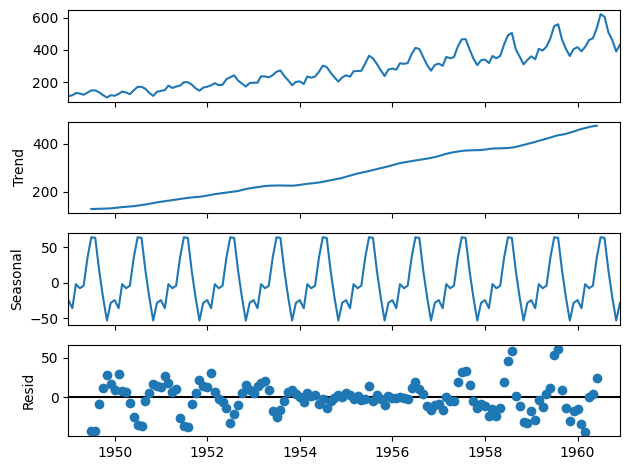

In [215]:
result = seasonal_decompose(df, model='additive', period=12)
plt.figure(figsize=(20, 20), dpi=100)

result.plot()
plt.show()

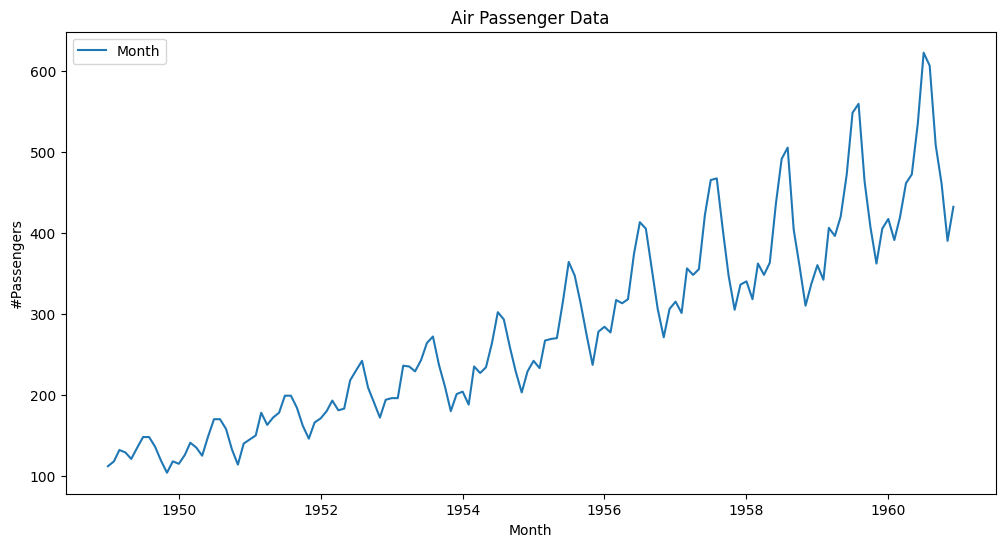

In [216]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( df['#Passengers'], label='Month')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Air Passenger Data')
plt.show()


### Understanding the dataset
- Calculate Autocorrelatio with lagged values
- find best order (lags) to include in the AR model

In [217]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['#Passengers'].shift(i)

In [218]:
df

,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Month,,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0


In [219]:
# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']

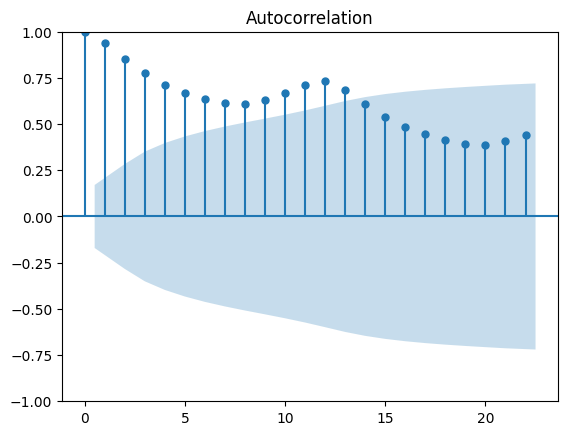

In [220]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['#Passengers']
plot_acf(series)
plt.show()

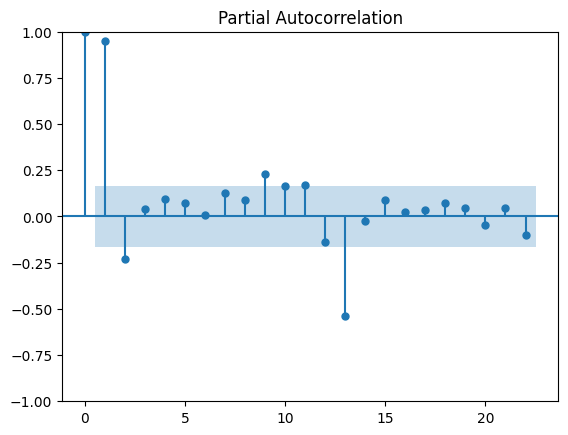

In [325]:
from statsmodels.graphics.tsaplots import plot_pacf
series = df['#Passengers']
plot_pacf(series)
plt.show()

In [221]:
for i in range(1, 20):
    print(f'Autocorrelatio lag{i} : {df['#Passengers'].corr(df['#Passengers'].shift(i))}')



Autocorrelatio lag1 : 0.9534698127349908
Autocorrelatio lag2 : 0.877814521250683
Autocorrelatio lag3 : 0.8091753494674343
Autocorrelatio lag4 : 0.7619631442519192
Autocorrelatio lag5 : 0.7467145386411967
Autocorrelatio lag6 : 0.7430176782904059
Autocorrelatio lag7 : 0.7438958557681642
Autocorrelatio lag8 : 0.7533286550086671
Autocorrelatio lag9 : 0.7959547706034779
Autocorrelatio lag10 : 0.861067824011823
Autocorrelatio lag11 : 0.940482311181646
Autocorrelatio lag12 : 0.989025566283191
Autocorrelatio lag13 : 0.9384523209585787
Autocorrelatio lag14 : 0.8516505223488854
Autocorrelatio lag15 : 0.7753146799720615
Autocorrelatio lag16 : 0.7245870025832566
Autocorrelatio lag17 : 0.7072463478987135
Autocorrelatio lag18 : 0.697625575283144
Autocorrelatio lag19 : 0.6939251310511682


## Autoregression model

In [222]:
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


In [223]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')



Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12
R Squared value: 0.88


In [224]:
df

,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Month,,,,,,,,,,,,,
1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0


## Moving Average

In [225]:
df = pd.read_csv('../../dataset/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [226]:
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)
 
df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [227]:
# Calculate 12-day Simple Moving Average (SMA)
df['SMA12'] = df['#Passengers'].rolling(12).mean()
 
# Remove NULL values
df.dropna(inplace=True)
 
# Print DataFrame
df

,#Passengers,SMA12
Month,,
1949-12-01,118,126.666667
1950-01-01,115,126.916667
1950-02-01,126,127.583333
1950-03-01,141,128.333333
1950-04-01,135,128.833333
...,...,...
1960-08-01,606,463.333333
1960-09-01,508,467.083333
1960-10-01,461,471.583333


<Axes: xlabel='Month'>

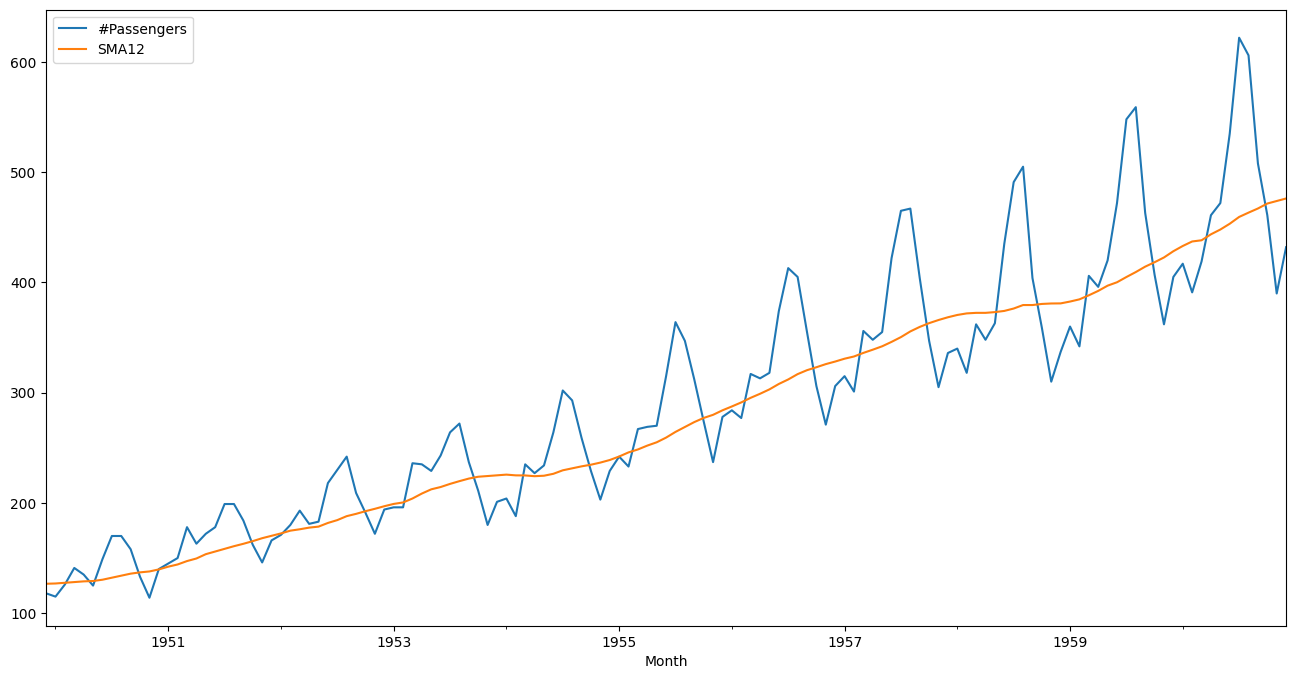

In [228]:
df[['#Passengers', 'SMA12']].plot(label='DF', 
                                  figsize=(16, 8))

In [229]:
data = np.array([125, 145, 186, 131, 151, 192, 137, 157, 198, 143, 163, 204])

pd.DataFrame(data).rolling(3).mean()


,0
0,NaN
1,NaN
2,152.0
3,154.0
4,156.0
5,158.0
6,160.0
7,162.0
8,164.0
9,166.0


In [230]:
from scipy.ndimage import uniform_filter1d

# Create a sample array

# Calculate the moving average with a window size of 3
moving_average = uniform_filter1d(data, size=3)

print(moving_average)

[131 152 154 156 158 160 162 164 166 168 170 190]


##### I (Integrated): To achieve a stationary time series, one that doesn’t exhibit trend or seasonality, differencing is applied. It typically involves subtracting an observation from its preceding observation

<Axes: xlabel='Month'>

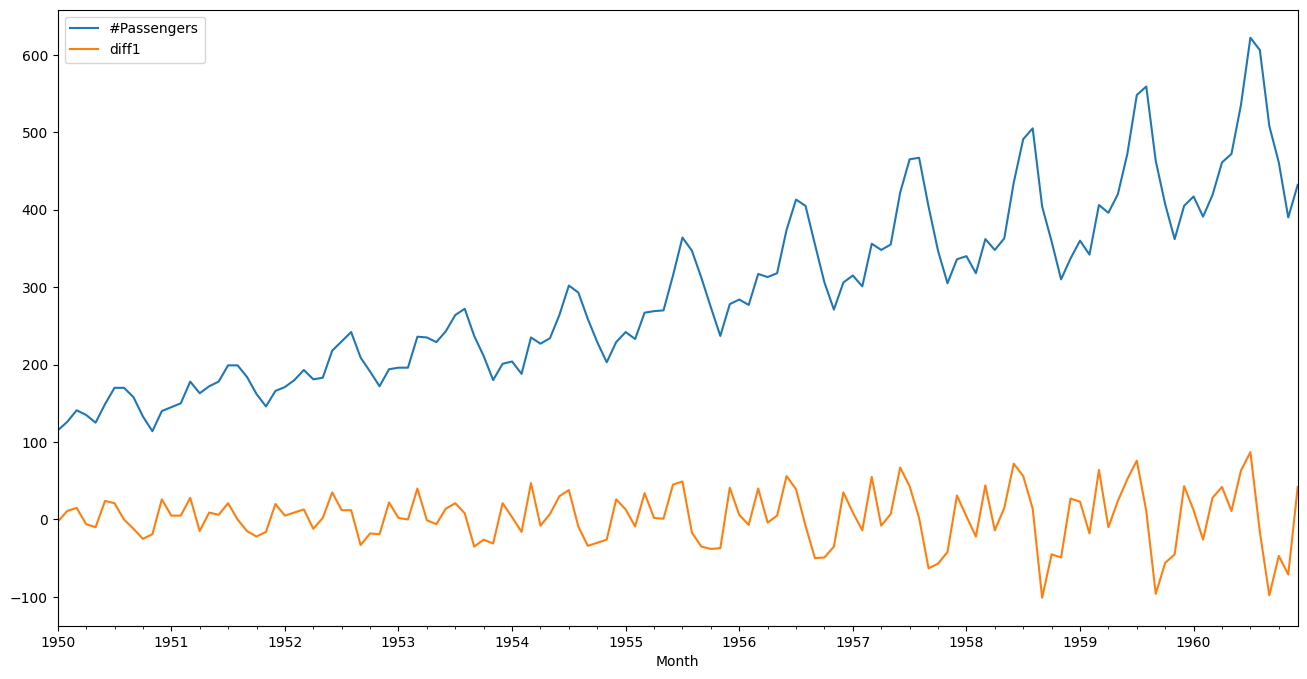

In [231]:
# diff1 
df['diff1'] = df['#Passengers'] - df['#Passengers'].shift(1)
# or using diff function 
df.dropna(inplace=True)
df[['#Passengers', 'diff1']].plot(label='DF', 
                                  figsize=(16, 8))

## Autoregressive Integrated Moving Average Model

In [232]:
df = pd.read_csv('../../dataset/AirPassengers.csv')
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)

df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [233]:

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
ADF Statistic: -2.8865058565449697
p-value: 0.04693983572510763


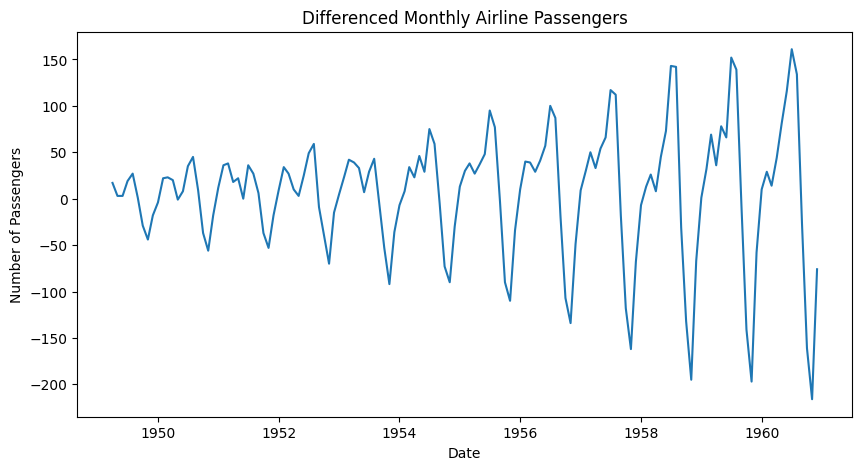

In [234]:



# Check for stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = df.diff(3).dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


ARMA model

In [235]:
# Fit the ARMA(1, 1) model
model = ARIMA(airline_data_diff, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  141
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -724.470
Date:                Tue, 23 Jul 2024   AIC                           1456.939
Time:                        10:35:20   BIC                           1468.734
Sample:                    04-01-1949   HQIC                          1461.732
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5482     13.428      0.488      0.626     -19.770      32.867
ar.L1          0.5059      0.055      9.200      0.000       0.398       0.614
ma.L1          0.6145      0.083      7.389      0.0

In [288]:
# Fit the ARIMA(1, 1, 0) model
model = ARIMA(y_train, order=(17, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:               ARIMA(17, 2, 14)   Log Likelihood                -413.618
Date:                Tue, 23 Jul 2024   AIC                            891.237
Time:                        10:48:01   BIC                            978.513
Sample:                    01-01-1949   HQIC                           926.653
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8442      0.780     -1.082      0.279      -2.374       0.685
ar.L2         -0.4806      0.633     -0.759      0.448      -1.722       0.760
ar.L3         -0.4662      0.487     -0.958      0.3

In [289]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')


Mean Absolute Error: 22.95
Root Mean Squared Error: 27.27
R Squared Error: 0.88


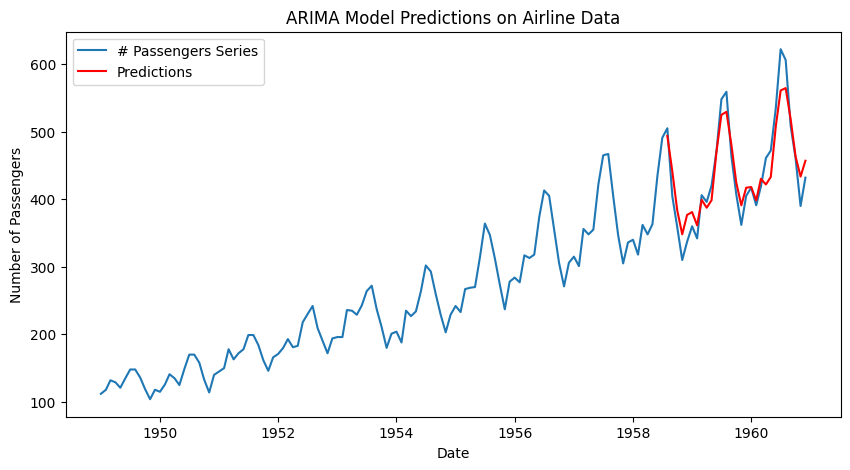

In [290]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df, label='# Passengers Series')
plt.plot(y_pred, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


## SARIMA model

In [318]:
df = pd.read_csv('../../dataset/AirPassengers.csv')
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)

df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [319]:

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']

In [321]:
sarima = SARIMAX(y_train, order=(1, 1, 2), seasonal_order=(10, 0, 1, 12)) 
sarima_fit = sarima.fit() 
print(sarima_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:                           #Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 2)x(10, 0, [1], 12)   Log Likelihood                -425.883
Date:                               Tue, 23 Jul 2024   AIC                            881.766
Time:                                       14:21:14   BIC                            922.809
Sample:                                   01-01-1949   HQIC                           898.423
                                        - 07-01-1958                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8073      0.140      5.784      0.000       0.534       1.081
ma.L1      

In [322]:
# Make predictions on the test set
y_pred = sarima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')


Mean Absolute Error: 17.08
Root Mean Squared Error: 22.42
R Squared Error: 0.92


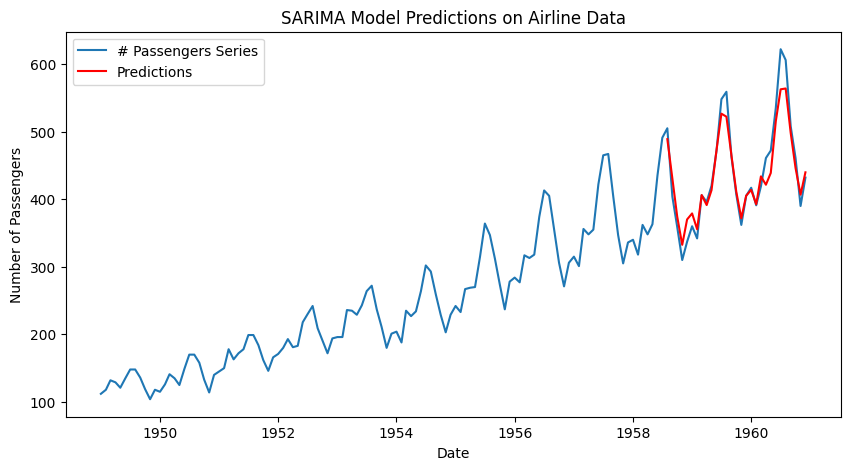

In [323]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df, label='# Passengers Series')
plt.plot(y_pred, label='Predictions', color='red')
plt.legend()
plt.title('SARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [324]:
import pmdarima as pm

# Fit auto_arima to find the best model parameters
auto_model = pm.auto_arima(y_train, seasonal=True, m=12, stepwise=True, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=757.714, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.16 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.486 seconds
                                     SARIMAX Results                                   